<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/M%C3%A9todoTransformadaInversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución Triangular - Teoría

La **distribución triangular** es una distribución de probabilidad continua definida por tres parámetros:
- **a**: valor mínimo (límite inferior),
- **b**: moda (valor más probable),
- **c**: valor máximo (límite superior).

Es útil cuando se conocen el valor mínimo, máximo y más probable, pero no se tiene suficiente información para asumir otra distribución como la normal. Su forma es de un triángulo, aumentando linealmente de `a` a `b` y decreciendo linealmente de `b` a `c`.

### Función de densidad (PDF):

\[
f(x) =
\begin{cases}
0 & \text{si } x < a \text{ o } x > c \\
\frac{2(x - a)}{(b - a)(c - a)} & \text{si } a \le x < b \\
\frac{2(c - x)}{(c - b)(c - a)} & \text{si } b \le x \le c \\
\end{cases}
\]

### Generación de números aleatorios - Método de la transformada inversa

Para simular esta distribución, se usa el método de la transformada inversa:

1. Se genera un número uniforme \( u \sim U(0, 1) \)
2. Se aplica la función inversa de la CDF:

\[
x =
\begin{cases}
a + \sqrt{u (b - a)(c - a)} & \text{si } u < \frac{b - a}{c - a} \\
c - \sqrt{(1 - u)(c - b)(c - a)} & \text{si } u \ge \frac{b - a}{c - a}
\end{cases}
\]

### Propiedades teóricas
### Propiedades teóricas

- **Media**:  
  $$
  \mu = \frac{a + b + c}{3}
  $$

- **Varianza**:  
  $$
  \sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
  $$

- **Desviación estándar**:  
  $$
  \sigma = \sqrt{\sigma^2}
  $$


=== Resultados ===
Media teórica: 3.0000
Media empírica: 3.0012
Desviación estándar teórica: 0.8165
Desviación estándar empírica: 0.8179


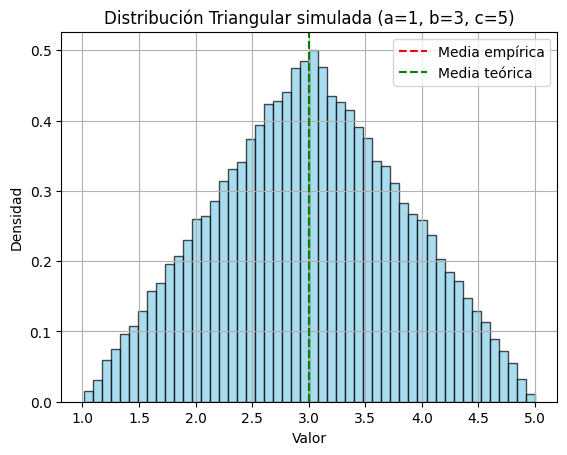

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros de la distribución triangular
a = 1
b = 3
c = 5

def f(u, a, b, c):
    F_b = (b - a) / (c - a)
    x = np.where(
        u < F_b,
        a + np.sqrt(u * (b - a) * (c - a)),
        c - np.sqrt((1 - u) * (c - b) * (c - a))
    )
    return x

n = 100000
u = np.random.uniform(0, 1, n)
experimento = f(u, a, b, c)

#Cálculos empíricos
media_empirica = np.mean(experimento)
desviacion_empirica = np.std(experimento)

#Cálculos teóricos
media_teorica = (a + b + c) / 3
desviacion_teorica = np.sqrt((a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18)

#Resultados
print("=== Resultados ===")
print(f"Media teórica: {media_teorica:.4f}")
print(f"Media empírica: {media_empirica:.4f}")
print(f"Desviación estándar teórica: {desviacion_teorica:.4f}")
print(f"Desviación estándar empírica: {desviacion_empirica:.4f}")

plt.hist(experimento, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución Triangular simulada (a=1, b=3, c=5)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(True)
plt.axvline(media_empirica, color='red', linestyle='--', label='Media empírica')
plt.axvline(media_teorica, color='green', linestyle='--', label='Media teórica')
plt.legend()
plt.show()
